In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1, Load Iris dataset

In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [10]:
view_data = pd.DataFrame(data= iris.data, columns=iris.feature_names)    
view_data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
27,5.2,3.5,1.5,0.2
67,5.8,2.7,4.1,1.0
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9
8,4.4,2.9,1.4,0.2
142,5.8,2.7,5.1,1.9
28,5.2,3.4,1.4,0.2
36,5.5,3.5,1.3,0.2
3,4.6,3.1,1.5,0.2
125,7.2,3.2,6.0,1.8


# 2, K-Means clustering

In [5]:
# (2) K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_db_score = davies_bouldin_score(X, kmeans_labels)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 3, DBSCAN and DBSCAN2 clustering

In [6]:
# (3) DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, dbscan_labels)
dbscan_db_score = davies_bouldin_score(X, dbscan_labels)

In [7]:
# (3) DBSCAN2 clustering
dbscan2 = DBSCAN(eps=0.3, min_samples=5)
dbscan2_labels = dbscan2.fit_predict(X)
dbscan2_silhouette = silhouette_score(X, dbscan2_labels)
dbscan2_db_score = davies_bouldin_score(X, dbscan2_labels)

use non lib

DBSCAN

In [1]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [5]:
def range_query(X, point_index, eps):
    neighbors = []
    for i, point in enumerate(X):
        if euclidean_distance(X[point_index], point) <= eps:
            neighbors.append(i)
    return neighbors

In [6]:
def dbscan(X, eps, min_samples):
    labels = np.zeros(len(X), dtype=int)
    cluster_label = 0

    for i, point in enumerate(X):
        if labels[i] != 0:
            continue  # Point already visited
        neighbors = range_query(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_label += 1
            expand_cluster(X, labels, i, neighbors, cluster_label, eps, min_samples)
    return labels


In [7]:
def expand_cluster(X, labels, point_index, neighbors, cluster_label, eps, min_samples):
    labels[point_index] = cluster_label
    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]
        if labels[neighbor_index] == -1:  # Noise point
            labels[neighbor_index] = cluster_label
        elif labels[neighbor_index] == 0:  # Not visited
            labels[neighbor_index] = cluster_label
            neighbor_neighbors = range_query(X, neighbor_index, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)
        i += 1

DBSCAN2 

In [8]:
def dbscan2(X, eps, min_samples):
    labels = np.zeros(len(X), dtype=int)
    cluster_label = 0

    for i, point in enumerate(X):
        if labels[i] != 0:
            continue  # Point already visited
        neighbors = range_query(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_label += 1
            expand_cluster2(X, labels, i, neighbors, cluster_label, eps, min_samples)
    return labels

In [11]:
def expand_cluster2(X, labels, point_index, neighbors, cluster_label, eps, min_samples):
    labels[point_index] = cluster_label
    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]
        if labels[neighbor_index] == -1:  # Noise point
            labels[neighbor_index] = cluster_label
        elif labels[neighbor_index] == 0:  # Not visited
            labels[neighbor_index] = cluster_label
            neighbor_neighbors = range_query(X, neighbor_index, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)
        i += 1

In [13]:
eps = 0.5
min_samples = 5

# Run DBSCAN
db_labels = dbscan(X, eps, min_samples)
print("DBSCAN", db_labels)
# Run DBSCAN2
db2_labels = dbscan2(X, eps, min_samples)
print("DBSCAN2", db_labels)

DBSCAN [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2 -1  2  2 -1  2  2  2  2  2  2  2 -1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2 -1  2  2
  2  2 -1  2  2  2  2  2  2 -1 -1  2 -1 -1  2  2  2  2  2  2  2 -1 -1  2
  2  2 -1  2  2  2  2  2  2  2  2 -1  2  2 -1 -1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]
DBSCAN2 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2 -1  2  2 -1  2  2  2  2  2  2  2 -1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2 -1  2  2
  2  2 -1  2  2  2  2  2  2 -1 -1  2 -1 -1  2  2  2  2  2  2  2 -1 -1  2
  2  2 -1  2  2  2  2  2  2  2  2 -1  2  2 -1 -1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]


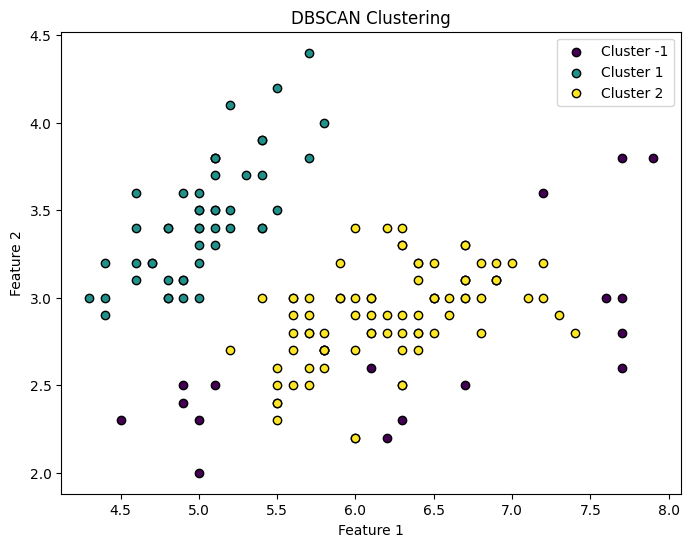

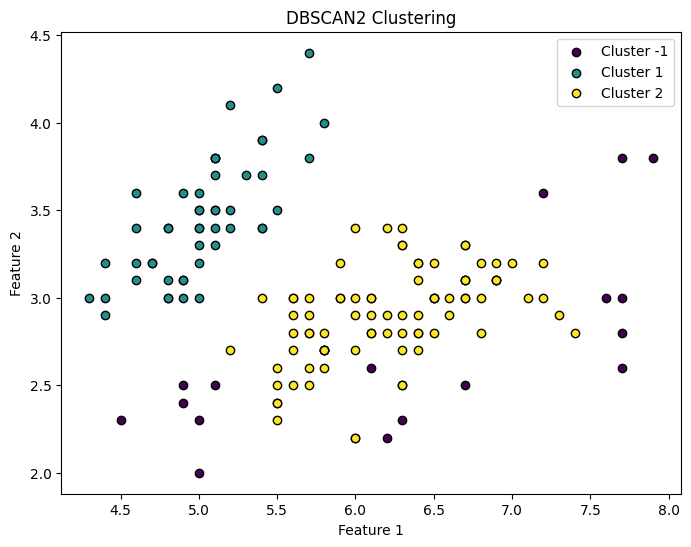

In [15]:
import matplotlib.pyplot as plt
def plot_clusters(X, labels, title):
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        cluster = X[labels == label]
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {label}', edgecolor='k')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters(X, db_labels, 'DBSCAN Clustering')
plot_clusters(X, db2_labels, 'DBSCAN2 Clustering')

# 4, Hierarchical clustering

In [8]:
# (4) Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
hierarchical_db_score = davies_bouldin_score(X, hierarchical_labels)

# 5, Cluster quality measures

In [9]:
# (5) Cluster quality measures
print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_db_score)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Davies-Bouldin Score:", dbscan_db_score)
print("DBSCAN2 Silhouette Score:", dbscan2_silhouette)
print("DBSCAN2 Davies-Bouldin Score:", dbscan2_db_score)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("Hierarchical Davies-Bouldin Score:", hierarchical_db_score)

K-Means Silhouette Score: 0.5511916046195919
K-Means Davies-Bouldin Score: 0.6660385791628499
DBSCAN Silhouette Score: 0.48603419703456857
DBSCAN Davies-Bouldin Score: 7.222448016359593
DBSCAN2 Silhouette Score: -0.05206429641095596
DBSCAN2 Davies-Bouldin Score: 2.4009421098997565
Hierarchical Silhouette Score: 0.5543236611296419
Hierarchical Davies-Bouldin Score: 0.6562564540642017


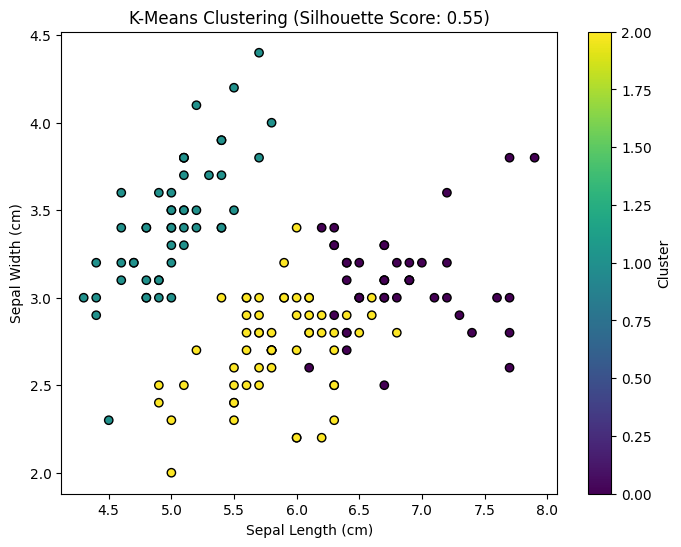

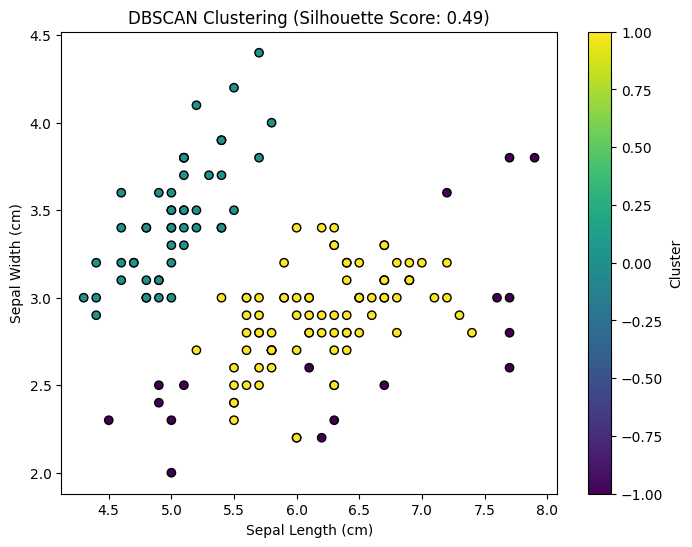

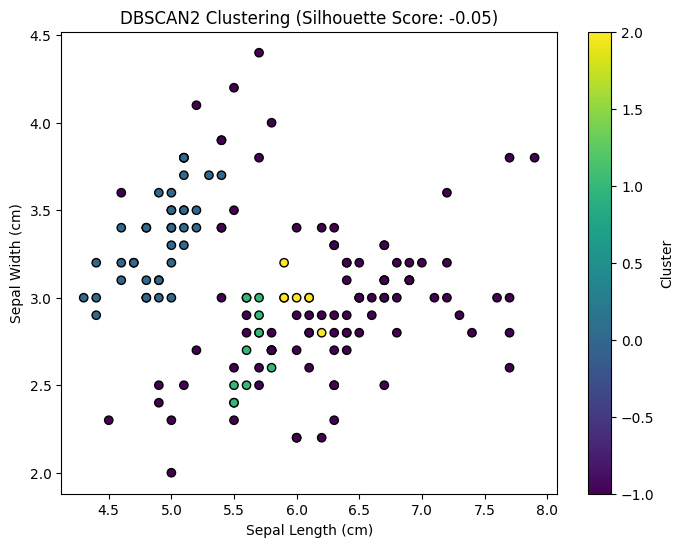

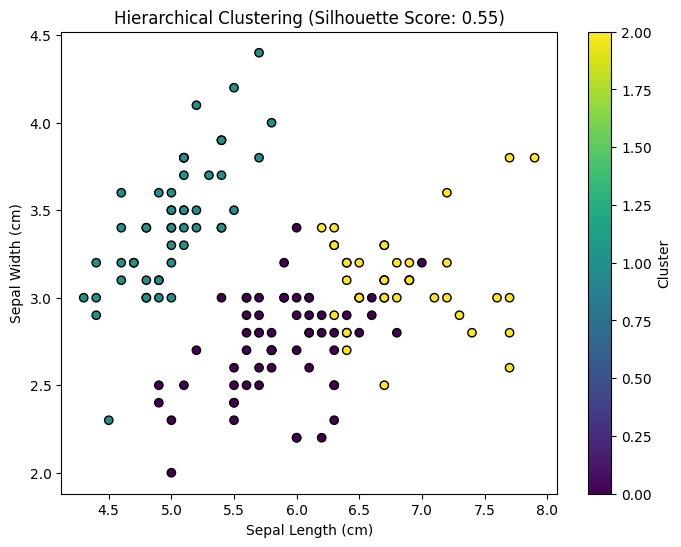

In [11]:
import matplotlib.pyplot as plt

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.colorbar(label='Cluster')
    plt.show()

plot_clusters(X[:, :2], kmeans_labels, f'K-Means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')
plot_clusters(X[:, :2], dbscan_labels, f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')
plot_clusters(X[:, :2], dbscan2_labels, f'DBSCAN2 Clustering (Silhouette Score: {dbscan2_silhouette:.2f})')
plot_clusters(X[:, :2], hierarchical_labels, f'Hierarchical Clustering (Silhouette Score: {hierarchical_silhouette:.2f})')